In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Konfigurasi File
NAMA_FILE_INPUT = 'development_set.csv'
NAMA_FILE_OUTPUT_TXT = 'rekomendasi_threshold.txt'

# Konfigurasi Visualisasi
sns.set(style="whitegrid")

In [2]:
# 1. Memuat Dataset
if os.path.exists(NAMA_FILE_INPUT):
    df = pd.read_csv(NAMA_FILE_INPUT)
    print(f"[INFO] Dataset dimuat: {len(df)} baris.")
else:
    raise FileNotFoundError(f"File {NAMA_FILE_INPUT} tidak ditemukan.")

# 2. Validasi Kolom
if 'panjang_teks' not in df.columns:
    raise ValueError("Kolom 'panjang_teks' tidak ditemukan. Pastikan tahap ekstraksi fitur sudah dijalankan.")

# 3. Statistik Deskriptif Dasar
print("\n" + "="*40)
print("STATISTIK DESKRIPTIF (PANJANG TEKS)")
print("="*40)
stats = df['panjang_teks'].describe()
print(stats)

# 4. Hitung Kuintil (Metode Equal-Frequency)
# Membagi data menjadi 5 bagian: 20%, 40%, 60%, 80%
P20 = df['panjang_teks'].quantile(0.20)
P40 = df['panjang_teks'].quantile(0.40)
P60 = df['panjang_teks'].quantile(0.60)
P80 = df['panjang_teks'].quantile(0.80)

print("\n" + "="*40)
print("TITIK POTONG KUINTIL (QUINTILE CUT-OFFS)")
print("="*40)
print(f"P20 (20%) : {P20:.2f}")
print(f"P40 (40%) : {P40:.2f}")
print(f"P60 (60%) : {P60:.2f}")
print(f"P80 (80%) : {P80:.2f}")

# Definisi Threshold Final (Integer)
thresholds = {
    "sangat_pendek_limit": int(P20),
    "pendek_limit": int(P40),
    "sedang_limit": int(P60),
    "panjang_limit": int(P80)
}

[INFO] Dataset dimuat: 842 baris.

STATISTIK DESKRIPTIF (PANJANG TEKS)
count    842.000000
mean      22.863420
std       25.254596
min        1.000000
25%        9.000000
50%       15.000000
75%       28.000000
max      256.000000
Name: panjang_teks, dtype: float64

TITIK POTONG KUINTIL (QUINTILE CUT-OFFS)
P20 (20%) : 7.00
P40 (40%) : 12.00
P60 (60%) : 19.00
P80 (80%) : 33.80


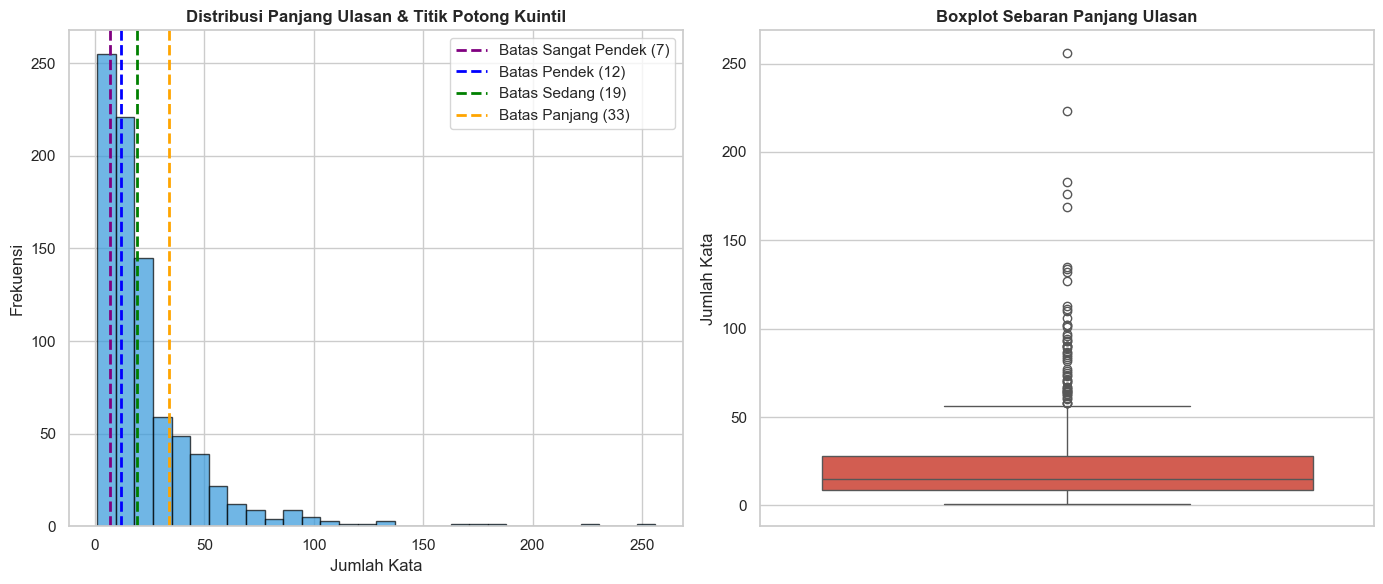

In [3]:
plt.figure(figsize=(14, 6))

# --- Subplot 1: Histogram Distribusi ---
plt.subplot(1, 2, 1)
plt.hist(df['panjang_teks'], bins=30, edgecolor='black', alpha=0.7, color='#3498db')

# Garis Threshold Kuintil
colors = ['purple', 'blue', 'green', 'orange']
labels = ['Sangat Pendek', 'Pendek', 'Sedang', 'Panjang']
points = [P20, P40, P60, P80]

for point, color, label in zip(points, colors, labels):
    plt.axvline(point, color=color, linestyle='--', linewidth=2, label=f'Batas {label} ({int(point)})')

plt.title('Distribusi Panjang Ulasan & Titik Potong Kuintil', fontsize=12, fontweight='bold')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.legend()

# --- Subplot 2: Boxplot ---
plt.subplot(1, 2, 2)
sns.boxplot(y=df['panjang_teks'], color='#e74c3c')
plt.title('Boxplot Sebaran Panjang Ulasan', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kata')

plt.tight_layout()
plt.show()

In [4]:
# Menyusun Laporan
laporan = []
laporan.append("REKOMENDASI THRESHOLD PANJANG ULASAN (METODE KUINTIL)")
laporan.append("="*60)
laporan.append(f"Total Data: {len(df)} ulasan\n")
laporan.append("KATEGORI FINAL:")

# Logika Penentuan Rentang (Rules Engine Logic)
t = thresholds
laporan.append(f"1. Sangat Pendek : <= {t['sangat_pendek_limit']} kata")
laporan.append(f"2. Pendek        : {t['sangat_pendek_limit'] + 1} - {t['pendek_limit']} kata")
laporan.append(f"3. Sedang        : {t['pendek_limit'] + 1} - {t['sedang_limit']} kata")
laporan.append(f"4. Panjang       : {t['sedang_limit'] + 1} - {t['panjang_limit']} kata")
laporan.append(f"5. Sangat Panjang: > {t['panjang_limit']} kata")

# Menampilkan di Terminal
print("\n".join(laporan))

with open(NAMA_FILE_OUTPUT_TXT, "w", encoding="utf-8") as f:
    f.write("\n".join(laporan))
print(f"\n[INFO] Laporan berhasil disimpan ke '{NAMA_FILE_OUTPUT_TXT}'")

REKOMENDASI THRESHOLD PANJANG ULASAN (METODE KUINTIL)
Total Data: 842 ulasan

KATEGORI FINAL:
1. Sangat Pendek : <= 7 kata
2. Pendek        : 8 - 12 kata
3. Sedang        : 13 - 19 kata
4. Panjang       : 20 - 33 kata
5. Sangat Panjang: > 33 kata

[INFO] Laporan berhasil disimpan ke 'rekomendasi_threshold.txt'
